# Openfast comparison

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 #'/ccs/proj/cfd162/lcheung/amr-wind-frontend.lcc/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/'
                ]
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

import matplotlib.pyplot as plt
# Make all plots inline 
%matplotlib inline

In [2]:
import postproengine as ppeng	
import ruamel.yaml    
yaml = ruamel.yaml.YAML(typ='rt')
Loader= yaml.load
loaderkwargs = {}
dumperkwargs = {}

In [3]:
def ppfunc(fig, ax):
    ax.set_xlim([0, 200])
    ax.grid(linestyle=':')
    
ppeng.ppfunc = ppfunc

In [4]:
ALM_BD_dir='/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/rundir_ALM_beamdyn'
ALM_ED_dir='/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/rundir_ALM_elastodyn'
FSI_ED_dir='/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/twoturbine_iea15mw_lowTI_lowWS_7x2_prod.flight'

In [5]:
yamlstring="""
globalattributes:
  verbose: True
  executeorder:
  - workflow1:
    #- openfast
    - plotcsv

trange: &trange [90, 150]
trangeFSI: &trangeFSI [162.5, 222.5]

workflow1:
  openfast:
  # For ALM-ED case
  - name: [T0, T1]
    filename: 
    - ALM_ED_dir/T0_OpenFAST3p5_IEA15MW/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
    - ALM_ED_dir/T1_OpenFAST3p5_IEA15MW/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.T1.out
    vars:
    - Time
    - GenSpeed
    - RotSpeed
    - BldPitch1
    - RotTorq
    - GenPwr
    - GenTq
    output_dir: OpenFAST_ALM_ED
    csv:  # Store information to CSV files
      individual_files: False
    operate:
      operations:
      - mean
      trange: *trange
  
  # For ALM-BD case
  - name: [T0, T1]
    filename: 
    - ALM_BD_dir/T0_OpenFAST3p5_IEA15MW/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
    - ALM_BD_dir/T1_OpenFAST3p5_IEA15MW/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.T1.out
    vars:
    - Time
    - GenSpeed
    - RotSpeed
    - BldPitch1
    - RotTorq
    - GenPwr
    - GenTq
    output_dir: OpenFAST_ALM_BD
    csv:  # Store information to CSV files
      individual_files: False
    operate:
      operations:
      - mean
      trange: *trange
    
  # For FSI-ED case
  - name: [T0, T1]
    filename: 
    - FSI_ED_dir/IEA-15-240-RWT-Monopile-T1.out
    - FSI_ED_dir/IEA-15-240-RWT-Monopile-T2.T1.out
    vars:
    - Time
    - GenSpeed
    - RotSpeed
    - BldPitch1
    - RotTorq
    - GenPwr
    - GenTq
    output_dir: OpenFAST_FSI_ED
    csv:  # Store information to CSV files
      individual_files: False
    operate:
      operations:
      - mean
      trange: *trangeFSI
    
  plotcsv:
  - name: GenPwrT1
    xlabel: 
    ylabel: 'Power [kW]'
    title: 'Turbine Power T1'
    legendopts: {'loc':'upper right'}
    postplotfunc: postproengine.ppfunc
    figname: fig1
    axesnum: 0
    csvfiles:
    - {'file':'OpenFAST_ALM_ED/T0.csv', 'xcol':'Time', 'ycol':'GenPwr', 'lineopts':{'color':'r', 'lw':1, 'linestyle':'-', 'label':'T1 ALM-ED'}}    
    - {'file':'OpenFAST_ALM_BD/T0.csv', 'xcol':'Time', 'ycol':'GenPwr', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'T1 ALM-BD'}}
    - {'file':'OpenFAST_FSI_ED/T0.csv', 'xcol':'Time', 'ycol':'GenPwr', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-', 'label':'T1 FSI-ED'}, 'xscalefunc':'lambda x:x-72.5'}

  - name: GenPwrT2
    xlabel: 
    ylabel: 'Power [kW]'
    title: 'Turbine Power T2'
    legendopts: {'loc':'upper right'}
    postplotfunc: postproengine.ppfunc
    figname: fig1
    axesnum: 1
    csvfiles:
    - {'file':'OpenFAST_ALM_ED/T1.csv', 'xcol':'Time', 'ycol':'GenPwr', 'lineopts':{'color':'r', 'lw':1, 'linestyle':'-',  'label':'T2 ALM-ED'}}    
    - {'file':'OpenFAST_ALM_BD/T1.csv', 'xcol':'Time', 'ycol':'GenPwr', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-',  'label':'T2 ALM-BD'}}
    - {'file':'OpenFAST_FSI_ED/T1.csv', 'xcol':'Time', 'ycol':'GenPwr', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-',  'label':'T2 FSI-ED'}, 'xscalefunc':'lambda x:x-72.5'}
    
  - name: GenTqT1
    xlabel:
    ylabel: 'Torque'
    title: 'Gen Torque T1'
    legendopts: {'loc':'upper right'}
    postplotfunc: postproengine.ppfunc
    figname: fig1
    axesnum: 2
    csvfiles:
    - {'file':'OpenFAST_ALM_ED/T0.csv', 'xcol':'Time', 'ycol':'GenTq', 'lineopts':{'color':'r', 'lw':1, 'linestyle':'-', 'label':'T1 ALM-ED'}}    
    - {'file':'OpenFAST_ALM_BD/T0.csv', 'xcol':'Time', 'ycol':'GenTq', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'T1 ALM-BD'}}
    - {'file':'OpenFAST_FSI_ED/T0.csv', 'xcol':'Time', 'ycol':'GenTq', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-',  'label':'T1 FSI-ED'}, 'xscalefunc':'lambda x:x-72.5'}

  - name: GenTqT2
    xlabel:
    ylabel: 'Torque'
    title: 'Gen Torque T2'
    legendopts: {'loc':'upper right'}
    postplotfunc: postproengine.ppfunc
    figname: fig1
    axesnum: 3
    csvfiles:
    - {'file':'OpenFAST_ALM_ED/T1.csv', 'xcol':'Time', 'ycol':'GenTq', 'lineopts':{'color':'r', 'lw':1, 'linestyle':'-', 'label':'T2 ALM-ED'}}    
    - {'file':'OpenFAST_ALM_BD/T1.csv', 'xcol':'Time', 'ycol':'GenTq', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'T2 ALM-BD'}}
    - {'file':'OpenFAST_FSI_ED/T1.csv', 'xcol':'Time', 'ycol':'GenTq', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-',  'label':'T2 FSI-ED'}, 'xscalefunc':'lambda x:x-72.5'}

  - name: RotSpeedT1
    xlabel: 
    ylabel: 'Rot Speed [rpm]'
    title: 'Rotor speed T1'
    legendopts: {'loc':'upper right'}
    postplotfunc: postproengine.ppfunc
    figname: fig1
    axesnum: 4
    csvfiles:
    - {'file':'OpenFAST_ALM_ED/T0.csv', 'xcol':'Time', 'ycol':'RotSpeed', 'lineopts':{'color':'r', 'lw':1, 'linestyle':'-', 'label':'T1 ALM-ED'}} 
    - {'file':'OpenFAST_ALM_BD/T0.csv', 'xcol':'Time', 'ycol':'RotSpeed', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'T1 ALM-BD'}}
    - {'file':'OpenFAST_FSI_ED/T0.csv', 'xcol':'Time', 'ycol':'RotSpeed', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-',  'label':'T1 FSI-ED'}, 'xscalefunc':'lambda x:x-72.5'}


  - name: RotSpeedT2
    xlabel: 
    ylabel: 'Rot Speed [rpm]'
    title: 'Rotor speed T2'
    legendopts: {'loc':'upper right'}
    postplotfunc: postproengine.ppfunc
    figname: fig1
    axesnum: 5
    csvfiles:
    - {'file':'OpenFAST_ALM_ED/T1.csv', 'xcol':'Time', 'ycol':'RotSpeed', 'lineopts':{'color':'r', 'lw':1, 'linestyle':'-', 'label':'T2 ALM-ED'}}    
    - {'file':'OpenFAST_ALM_BD/T1.csv', 'xcol':'Time', 'ycol':'RotSpeed', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'T2 ALM-BD'}}
    - {'file':'OpenFAST_FSI_ED/T1.csv', 'xcol':'Time', 'ycol':'RotSpeed', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-',  'label':'T2 FSI-ED'}, 'xscalefunc':'lambda x:x-72.5'}
    
  - name: BldPitch1_T1
    xlabel: 'Time [s]'
    ylabel: 'Blade pitch [deg]'
    title: 'Blade pitch T1'
    legendopts: {'loc':'upper right'}
    postplotfunc: postproengine.ppfunc
    figname: fig1
    axesnum: 6
    csvfiles:
    - {'file':'OpenFAST_ALM_ED/T0.csv', 'xcol':'Time', 'ycol':'BldPitch1', 'lineopts':{'color':'r', 'lw':1, 'linestyle':'-', 'label':'T1 ALM-ED'}}    
    - {'file':'OpenFAST_ALM_BD/T0.csv', 'xcol':'Time', 'ycol':'BldPitch1', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'T1 ALM-BD'}}
    - {'file':'OpenFAST_FSI_ED/T0.csv', 'xcol':'Time', 'ycol':'', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-',  'label':'T1 FSI-ED'}, 
       'xscalefunc':'lambda x:x-72.5', 'yscalefunc':'lambda y:y["BldPitch1"]'}

  - name: BldPitch1_T2
    xlabel: 'Time [s]'
    ylabel: 'Blade pitch [deg]'
    title: 'Blade pitch T2'
    legendopts: {'loc':'upper right'}
    postplotfunc: postproengine.ppfunc
    figname: fig1
    axesnum: 7
    csvfiles:
    - {'file':'OpenFAST_ALM_ED/T1.csv', 'xcol':'Time', 'ycol':'BldPitch1', 'lineopts':{'color':'r', 'lw':1, 'linestyle':'-', 'label':'T2 ALM-ED'}}    
    - {'file':'OpenFAST_ALM_BD/T1.csv', 'xcol':'Time', 'ycol':'BldPitch1', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'T2 ALM-BD'}}
    - {'file':'OpenFAST_FSI_ED/T1.csv', 'xcol':'Time', 'ycol':'', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-',  'label':'T2 FSI-ED'}, 
       'xscalefunc':'lambda x:x-72.5', 'yscalefunc':'lambda y:y["BldPitch1"]'}

"""
f = io.StringIO(yamlstring.replace('ALM_BD_dir', ALM_BD_dir).replace('ALM_ED_dir', ALM_ED_dir).replace('FSI_ED_dir', FSI_ED_dir))
#print(yamlstring.replace('ALM_BD_dir', ALM_BD_dir).replace('ALM_ED_dir', ALM_BD_dir))
yamldict = Loader(f, **loaderkwargs)

Initialized plotcsv
Running plotcsv


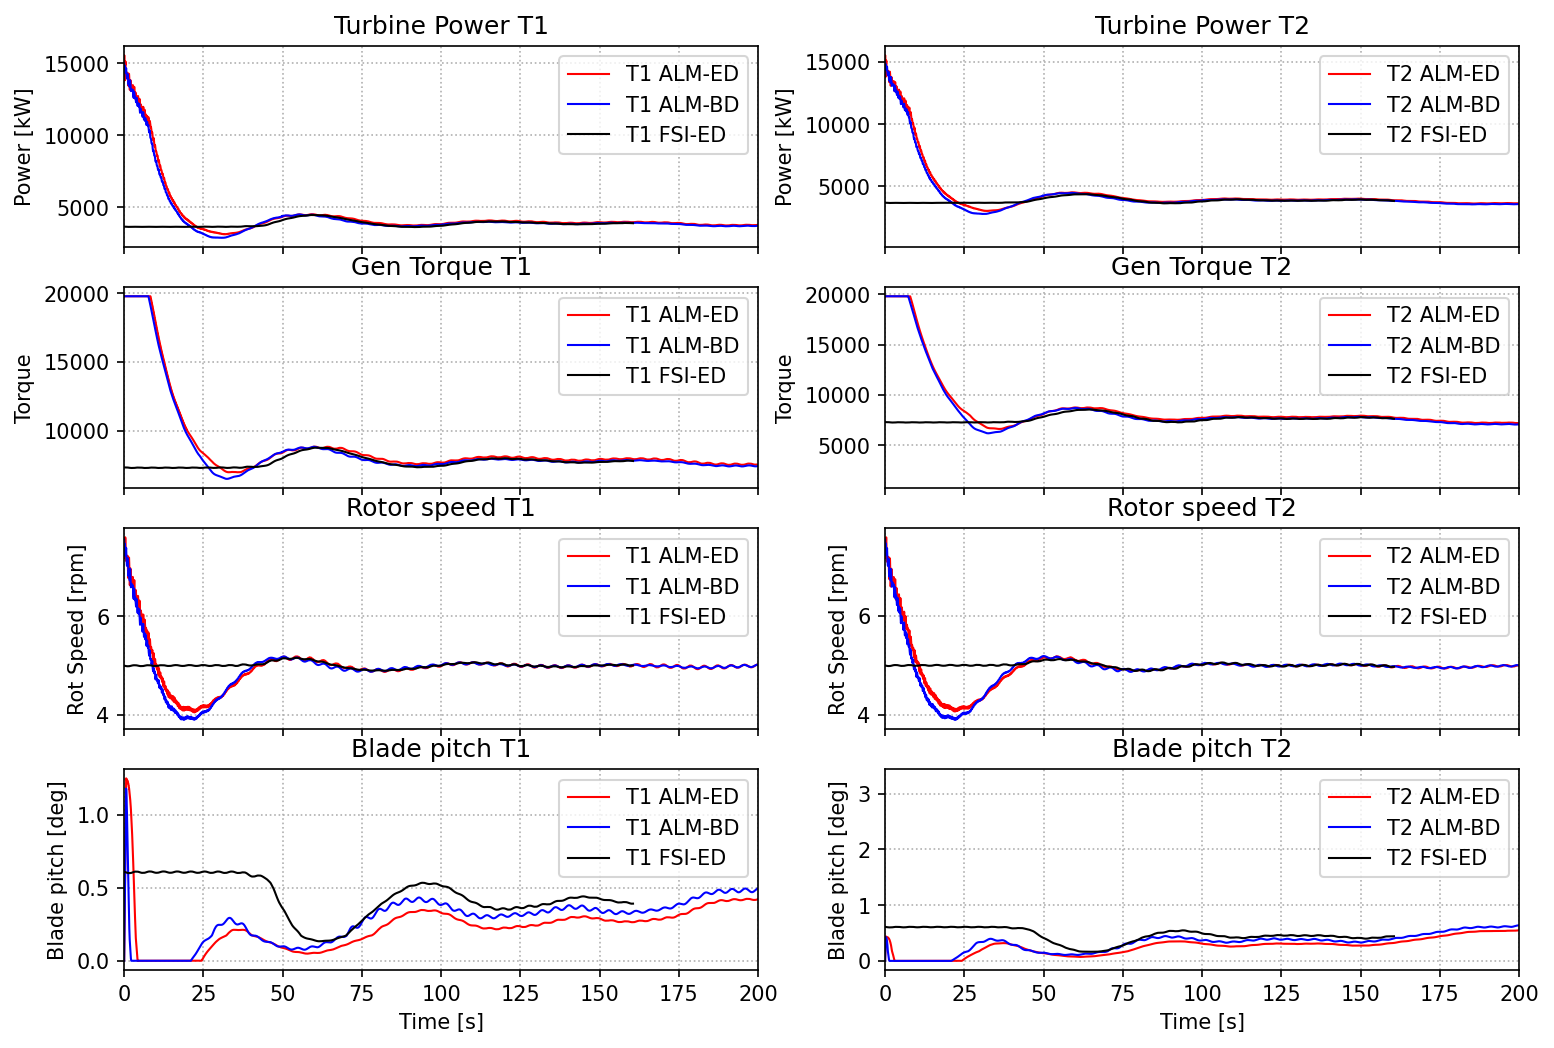

In [6]:
fig, axs = plt.subplots(4,2, figsize=(12,8), sharex=True, num="fig1", dpi=150)
# Run the driver
ppeng.driver(yamldict)